In [2]:
import numpy as np
import random
import csv

import cognitive_GLVQ as cglvq
import optimizer as opt
import GLVQ as glvq


In [3]:
classes = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2,
    "target": None
}

num_epochs = 100
num_prototypes = 4

## Data Preperation

In [4]:
# opening the CSV file
with open('dataset/iris_dataset.csv', mode ='r')as file:
   
  # reading the CSV file
    csvFile = csv.reader(file)
 
  # displaying the contents of the CSV file
    features = []
    labels = []
    for row in csvFile:
        feature = row[:-1]
        label = [classes[row[-1]]]
        features.append(feature)
        labels.append(label)
    features = np.array(features[1:], dtype=np.float64)
    labels = np.array(labels[1:], dtype=np.int32)

# Choosing prototypes
index_list = []
for i in range(3):
  index_i = np.where(labels == i)
  index_list.append(index_i[0])

prototype_index = []
for i in range(3):
  prototype_index_i = random.sample(list(index_list[i]),num_prototypes)
  prototype_index += prototype_index_i
prototype_index.sort(reverse=True)

prototypes = [(features[i],labels[i]) for i in prototype_index]

for i in prototype_index:
  features = np.delete(features, i, axis=0)
  labels = np.delete(labels, i, axis=0)

dataset = [(features[i],labels[i]) for i in range(len(features))]

permutation = np.random.permutation(len(dataset))
random.shuffle(dataset)
random.shuffle(prototypes)

train_set_acc = dataset[:int(len(dataset)*0.8)]
test_set_acc = dataset[int(len(dataset)*0.8):]

In [5]:
unique, count = np.unique(labels, return_counts=True)
dict(zip(unique, count))
classes = unique
classes = classes.tolist()

# Models

### GLVQ

In [6]:
learning_rate = 0.1
glvq_acc = glvq.GLVQ(prototypes,learning_rate)
hist = glvq_acc.train(num_epochs,train_set_acc,test_set_acc)

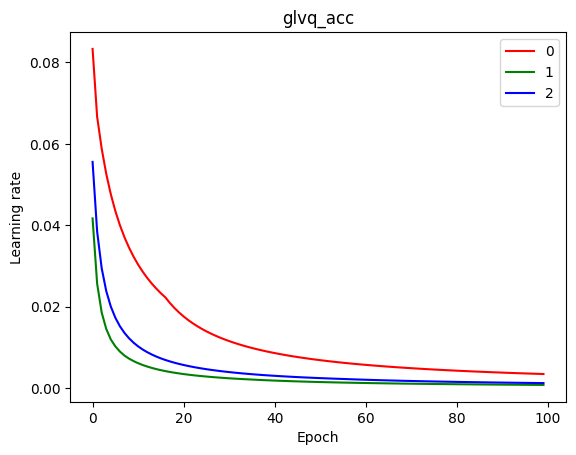

In [7]:
glvq_acc.lr_graph("glvq_acc")

In [8]:
learning_rate = 0.03
glvq_acc = glvq.GLVQ(prototypes,learning_rate)
hist = glvq_acc.train(num_epochs,train_set_acc,test_set_acc)

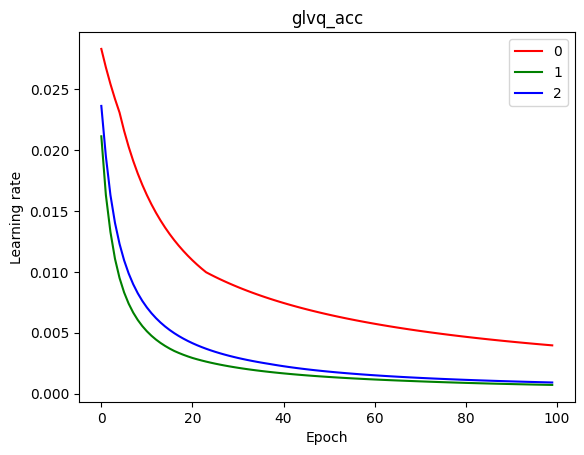

In [9]:
glvq_acc.lr_graph("glvq_acc")

In [10]:
learning_rate = 0.01
glvq_acc = glvq.GLVQ(prototypes,learning_rate)
hist = glvq_acc.train(num_epochs,train_set_acc,test_set_acc)

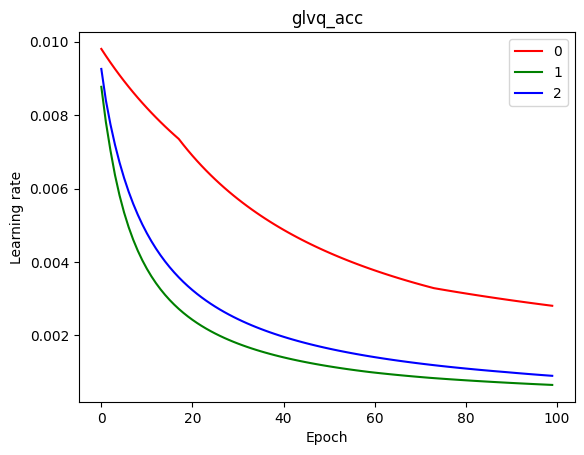

In [11]:
glvq_acc.lr_graph("glvq_acc")

In [12]:
learning_rate = 0.1
cp_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = cp_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.conditional_probability)

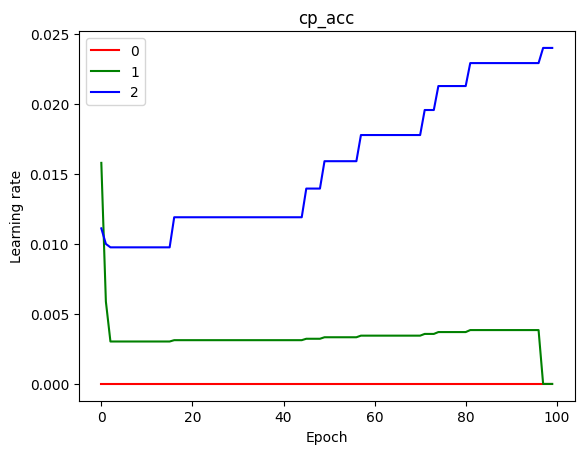

In [13]:
cp_glvq_acc.lr_graph("cp_acc")

In [14]:
learning_rate = 0.03
cp_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = cp_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.conditional_probability)

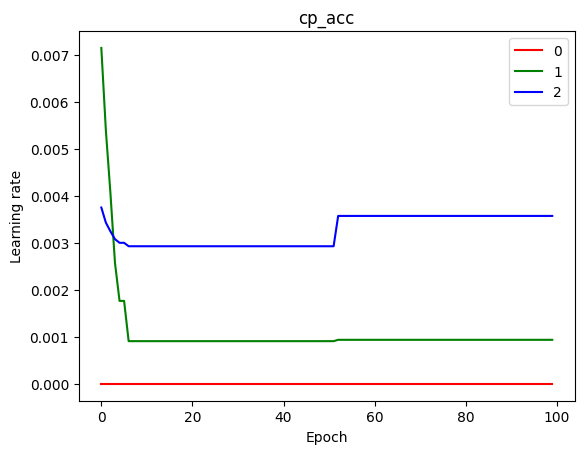

In [15]:
cp_glvq_acc.lr_graph("cp_acc")

In [16]:
learning_rate = 0.01
cp_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = cp_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.conditional_probability)

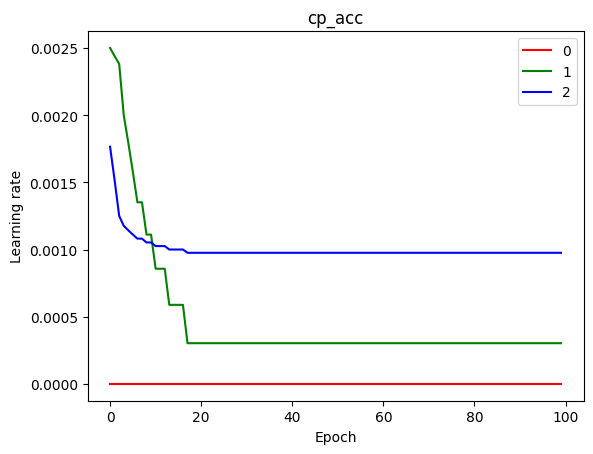

In [17]:
cp_glvq_acc.lr_graph("cp_acc")

##### LS

In [18]:
learning_rate = 0.1
ls_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = ls_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.loose_symmetry)

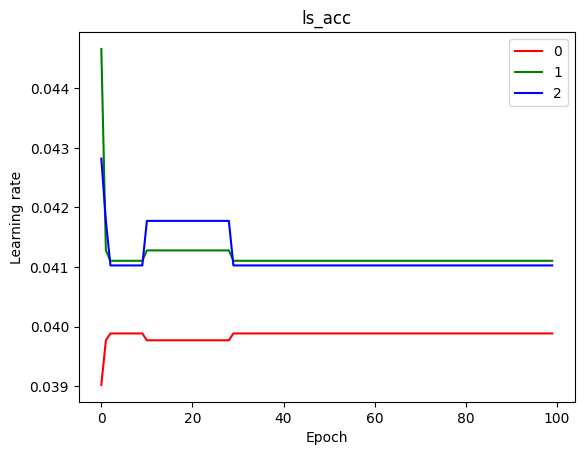

In [19]:
ls_glvq_acc.lr_graph("ls_acc")

In [20]:
learning_rate = 0.03
ls_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = ls_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.loose_symmetry)

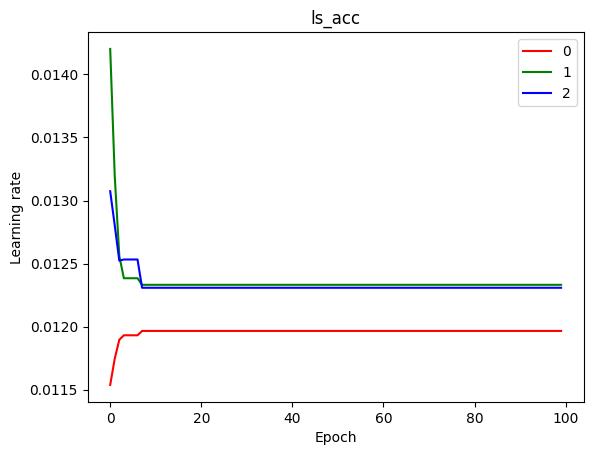

In [21]:
ls_glvq_acc.lr_graph("ls_acc")

In [22]:
learning_rate = 0.01
ls_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = ls_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.loose_symmetry)

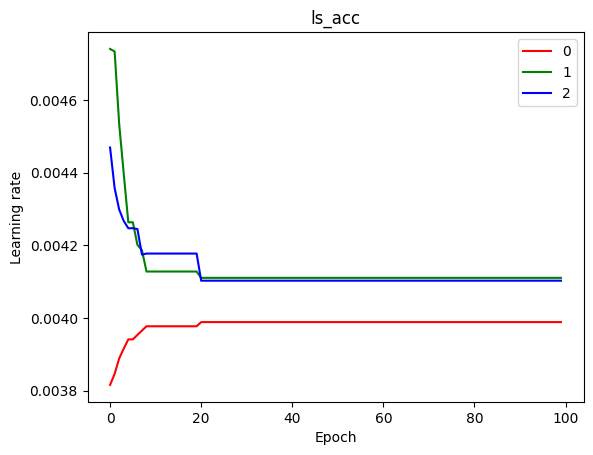

In [23]:
ls_glvq_acc.lr_graph("ls_acc")

##### LSR

In [24]:
learning_rate = 0.1
lsr_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = lsr_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.loose_symmetry_rarity)

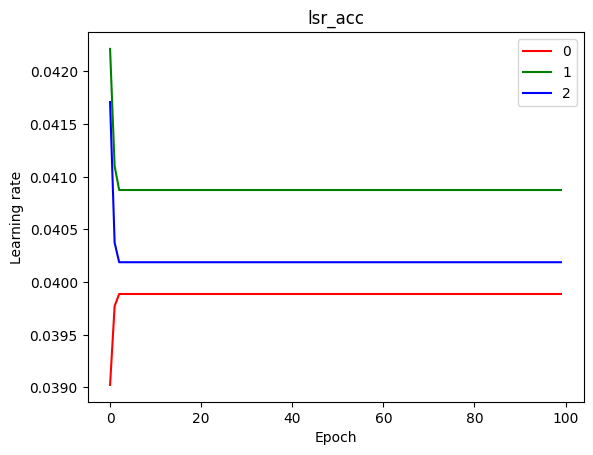

In [25]:
lsr_glvq_acc.lr_graph("lsr_acc")

In [26]:
learning_rate = 0.03
lsr_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = lsr_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.loose_symmetry_rarity)

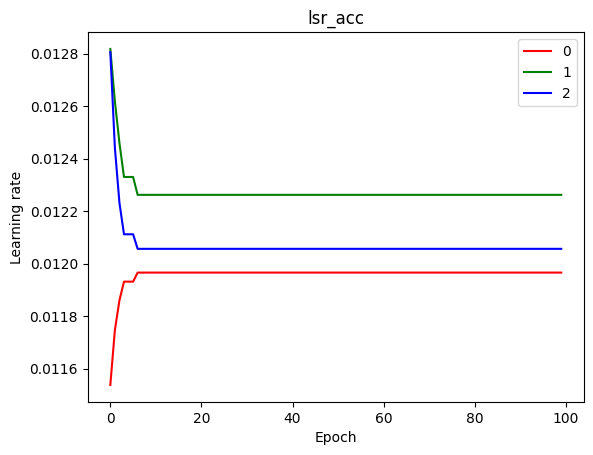

In [27]:
lsr_glvq_acc.lr_graph("lsr_acc")

In [28]:
learning_rate = 0.01
lsr_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = lsr_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.loose_symmetry_rarity)

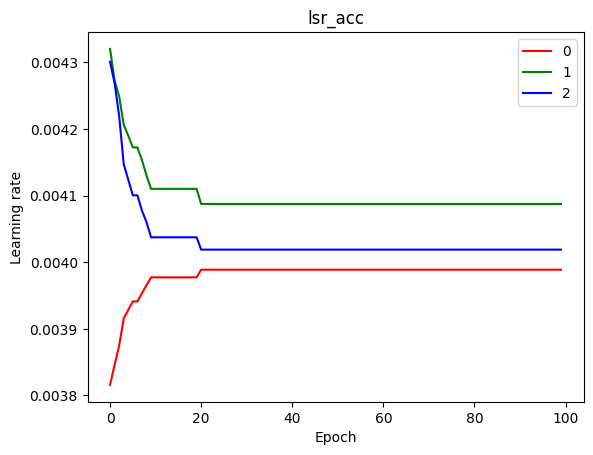

In [29]:
lsr_glvq_acc.lr_graph("lsr_acc")

##### DFH

In [30]:
learning_rate = 0.1
dfh_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = dfh_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.dual_factor_heuristic)

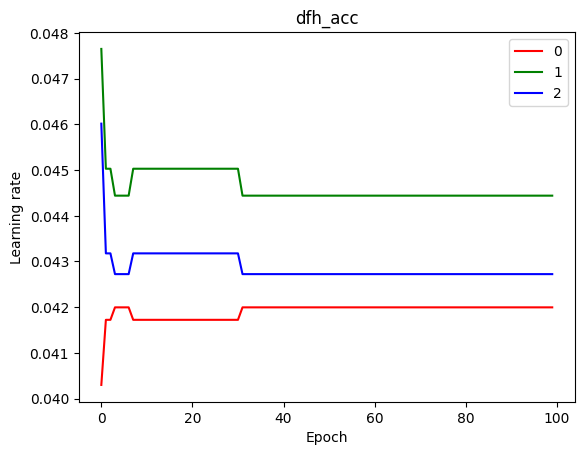

In [31]:
dfh_glvq_acc.lr_graph("dfh_acc")

In [32]:
learning_rate = 0.03
dfh_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = dfh_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.dual_factor_heuristic)

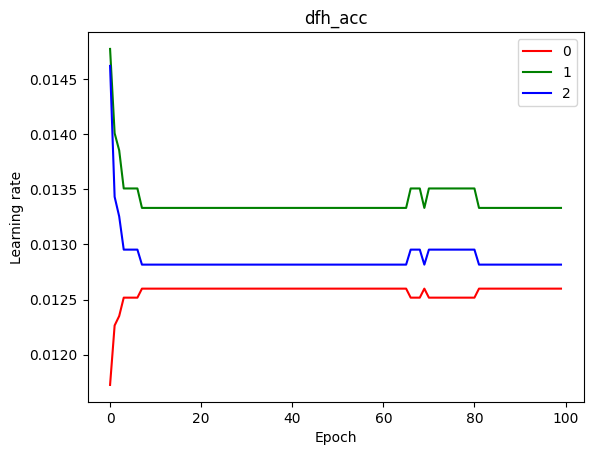

In [33]:
dfh_glvq_acc.lr_graph("dfh_acc")

In [34]:
learning_rate = 0.01
dfh_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = dfh_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.dual_factor_heuristic)

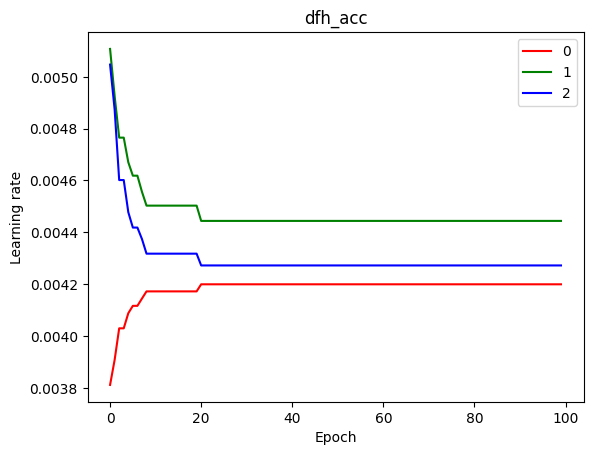

In [35]:
dfh_glvq_acc.lr_graph("dfh_acc")